# Punto 1

In [16]:
from IPython.display import display, Math
import sympy as sp
from sympy.parsing.sympy_parser import parse_expr
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import sympy.plotting as pls
import seaborn as sns
import numpy as np
import math as mt

In [17]:
x = parse_expr('x')
funcion = parse_expr('sinc(x)')
n = 1
x0 = 0.1
error = 1
error_deseado = 10 ** -10

polinomio = funcion.subs(x, x0)

error_real = []

In [18]:
while error >= error_deseado:

  error = np.abs(np.float(funcion.subs(x, 0.2).evalf() - polinomio.subs(x, 0.2).evalf()))

  polinomio += sp.diff(funcion, x, n).subs(x, x0) * ((x - x0)**n)/(np.math.factorial(n))

  error_real.append(error)
  n = n + 1

n = n - 1 #al llegar a la última condición n fue incrementado 1 vez más de su valor real

In [19]:
derivada_n_siguiente = ((8 * x) * (x ** 6 + -42 * x ** 4 + 840 * x ** 2 -5040) * sp.cos(x) + (x ** 8 -56 * x ** 6 + 1680 * x ** 4 -20160 * x ** 2 + 40320) * sp.sin(x)) / x ** 9

In [20]:
resultado = derivada_n_siguiente.subs(x, 0.14).evalf()

In [21]:
error_teorico = [resultado / mt.factorial(n+1) for n in [1, 2, 3, 4, 5, 6, 7]]

In [22]:
error_teorico

[0.0551127626070480,
 0.0183709208690160,
 0.00459273021725400,
 0.000918546043450801,
 0.000153091007241800,
 2.18701438916857e-5,
 2.73376798646072e-6]

In [26]:
error_teorico_np = np.array([0.0551127626070480,
0.0183709208690160,
0.00459273021725400,
0.000918546043450801,
0.000153091007241800,
2.18701438916857e-5,
2.73376798646072e-6])

In [27]:
error_real 

[0.0049875124929754655,
 0.0016575113027197386,
 4.158339365845087e-06,
 8.289727436716632e-07,
 1.3863276082659581e-09,
 1.9739410106467403e-10,
 2.473576898864849e-13]

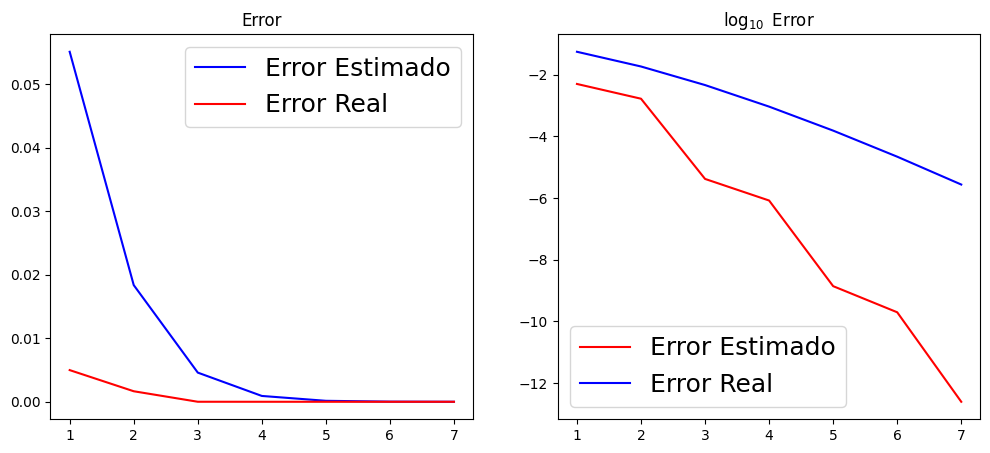

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
ax1.plot([1, 2, 3, 4, 5, 6, 7],error_teorico,color='b')
ax1.plot([1, 2, 3, 4, 5, 6, 7],error_real, color = 'r')
ax1.set_title('Error')
ax1.legend(['Error Estimado', 'Error Real'], prop={'size':18})

# try:

#   ax2.plot([1, 2, 3, 4, 5, 6, 7],np.log10(error_teorico),color='b')

# except TypeError:

#   print("algo fallo aqui")

ax2.plot([1, 2, 3, 4, 5, 6, 7],np.log10(error_real), color = 'r')
ax2.plot([1, 2, 3, 4, 5, 6, 7],np.log10(error_teorico_np),color='b')
ax2.set_title('$\log_{10}$ Error')
ax2.legend(['Error Estimado', 'Error Real'], prop={'size':18});

# Punto 2

In [ ]:
# noshe

# Punto 3

In [ ]:
x = parse_expr('x')
f = parse_expr('sin(x)')
x0 = 0
n = 6

In [ ]:
p = sp.series(expr=f, x=x, x0=x0, n=n)
display(Math(sp.latex(p)))

<IPython.core.display.Math object>

In [ ]:
max_n = 8
p = [sp.series(expr=f, x=x, x0=x0, n=ni).removeO() for ni in range(2, max_n)]
p_latex = [sp.latex(pol) for pol in p]
distLatex = [display(Math(q)) for q in p_latex]
n_pol = len(p)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

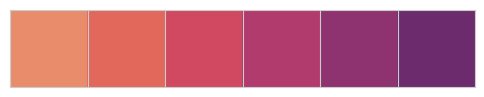

In [ ]:
sns.set_style('whitegrid')
cmap = sns.color_palette('flare')
sns.palplot(cmap)

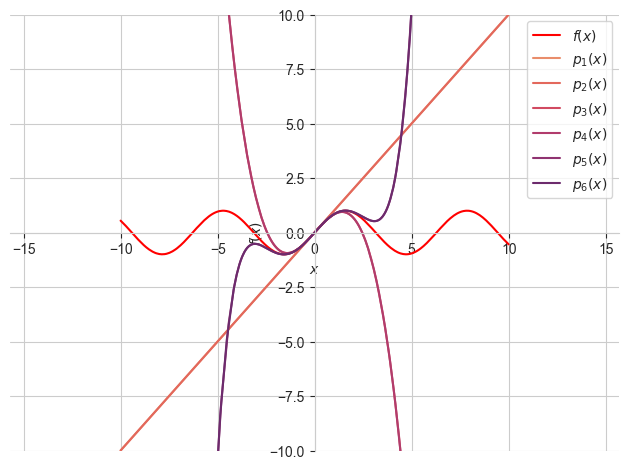

In [ ]:
fig = pls.plot(f,xlim=[(-5*3.14),(5*3.14)],ylim=[-10, 10], line_color='r', show=False)
labs = ['$f(x)$']
for n in range(n_pol):
  c = cmap[n]
  labs.append(f'$p_{n+1}(x)$')
  fig.extend(pls.plot(p[n],xlim=[(-5*3.14),(5*3.14)],ylim=[-10,10], line_color=c, show=False))
for n in range(n_pol+1): fig[n].label = labs[n]
fig.legend = True
fig.show()

In [ ]:
import numpy as np
import math as mat

In [ ]:
x = parse_expr('x')
f = parse_expr('sinc(x)')
x0 = 0
n = 1

In [ ]:
p = sp.series(expr=f, x=x, x0=x0, n=n)
display(Math(sp.latex(p)))

<IPython.core.display.Math object>

In [ ]:
max_n = 12
p = [sp.series(expr=f, x=x, x0=x0, n=ni).removeO() for ni in range(2, max_n)]
p_latex = [sp.latex(pol) for pol in p]
distLatex = [display(Math(q)) for q in p_latex]
n_pol = len(p)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>